In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
import sys
sys.setrecursionlimit(100000)

In [ ]:
rd = pd.read_csv("pokemon_alopez247.csv")
rd.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [ ]:
print(rd.isnull().sum())

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64


In [ ]:
type2_vc = rd["Type_2"].value_counts()

In [ ]:
rd["Type_2"].fillna(type2_vc.keys()[0],inplace=True)
rd["Type_2"].isnull().sum()

0

In [ ]:
rd

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,Flying,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [ ]:
rd["Pr_Male"].fillna(rd["Pr_Male"].mean(),inplace=True)
rd["Pr_Male"].isnull().sum()

0

In [ ]:
egg2_vc = rd["Egg_Group_2"].value_counts()
rd["Egg_Group_2"].fillna(egg2_vc.keys()[0],inplace=True)
rd["Egg_Group_2"].isnull().sum()

0

In [ ]:
rd.isnull().sum().sum()

0

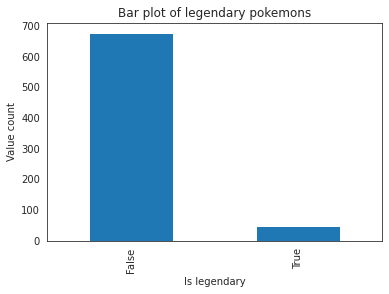

In [ ]:
islegendary_vc = rd["isLegendary"].value_counts()
plt.title("Bar plot of legendary pokemons")
plt.xlabel("Is legendary")
plt.ylabel("Value count")
islegendary_vc.plot.bar()

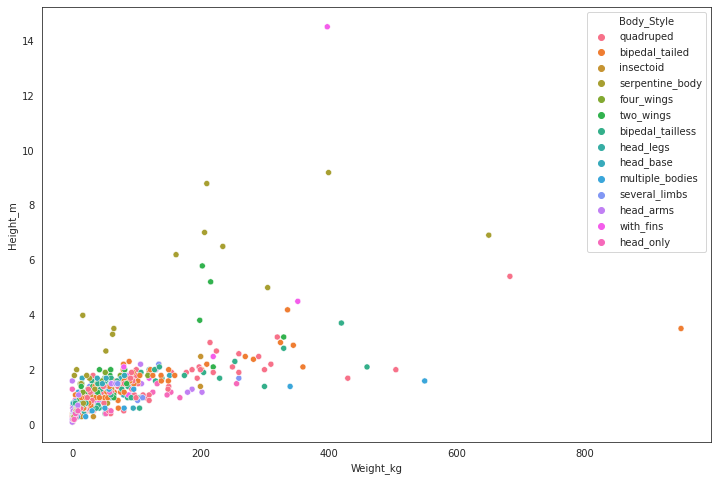

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weight_kg',y='Height_m',data=rd,hue='Body_Style')

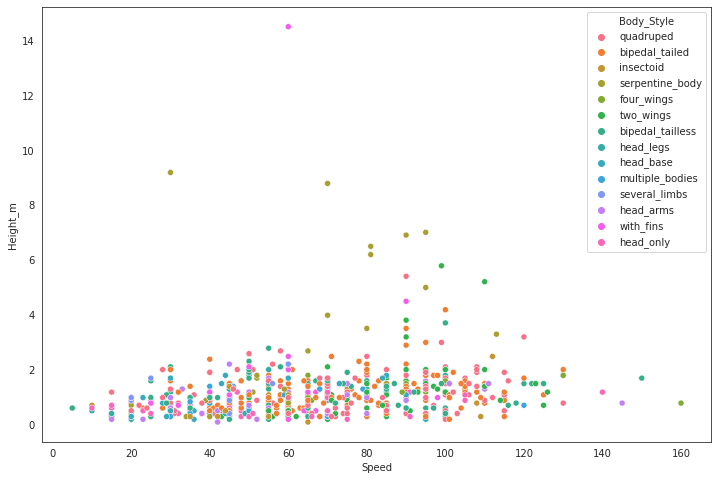

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Speed',y='Height_m',data=rd,hue='Body_Style')

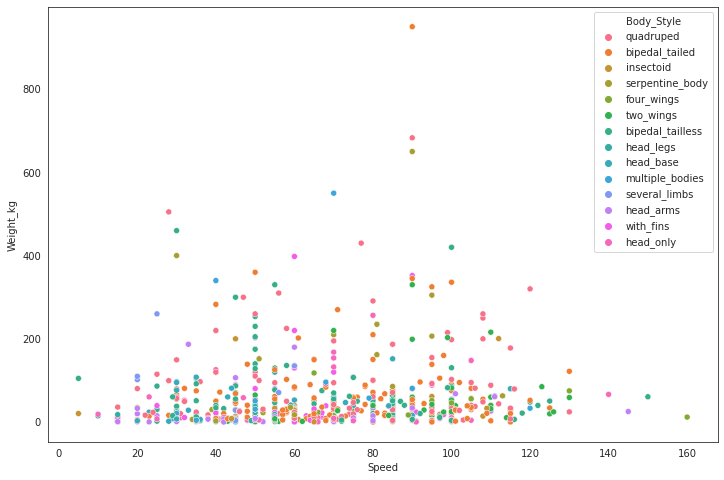

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Speed',y='Weight_kg',data=rd,hue='Body_Style')

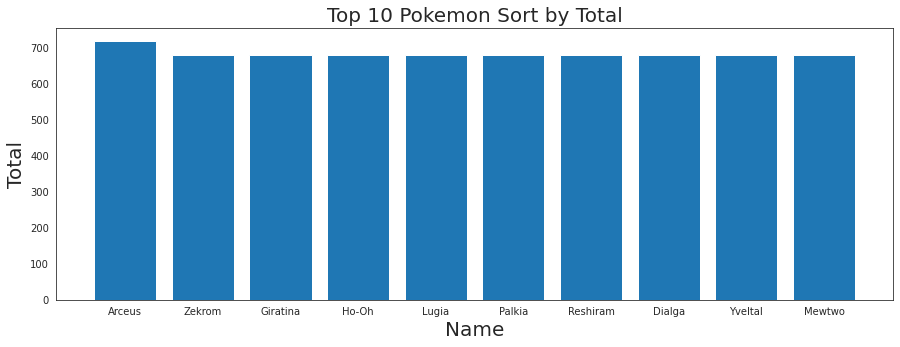

In [ ]:
Total_Top_10 = rd.sort_values(by="Total", ascending=False).head(10)
Total_Top_10
plt.figure(figsize=(15, 5))
plt.xlabel('Name', fontsize="20")
plt.ylabel('Total', fontsize="20")
plt.title('Top 10 Pokemon Sort by Total', fontsize="20")
plt.bar(Total_Top_10.Name, Total_Top_10.Total)
plt.show()

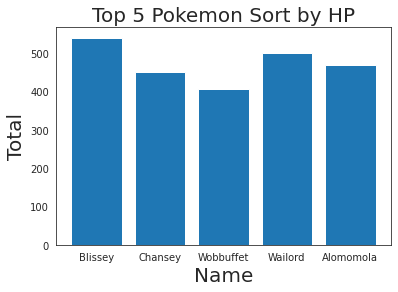

In [ ]:
HP_Top_5 = rd.sort_values(by='HP', ascending=False).head()
plt.xlabel('Name', fontsize="20")
plt.ylabel('Total', fontsize="20")
plt.title('Top 5 Pokemon Sort by HP', fontsize="20")
plt.bar(HP_Top_5.Name, HP_Top_5.Total)
plt.show()

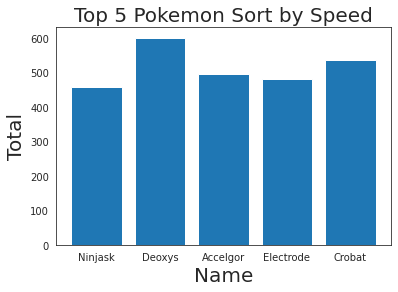

In [ ]:
Speed_top_5 = rd.sort_values(by="Speed", ascending=False).head(5)
Speed_top_5[["Speed","Name"]]
plt.xlabel('Name', fontsize="20")
plt.ylabel('Total', fontsize="20")
plt.title('Top 5 Pokemon Sort by Speed', fontsize="20")
plt.bar(Speed_top_5.Name, Speed_top_5.Total)
plt.show()

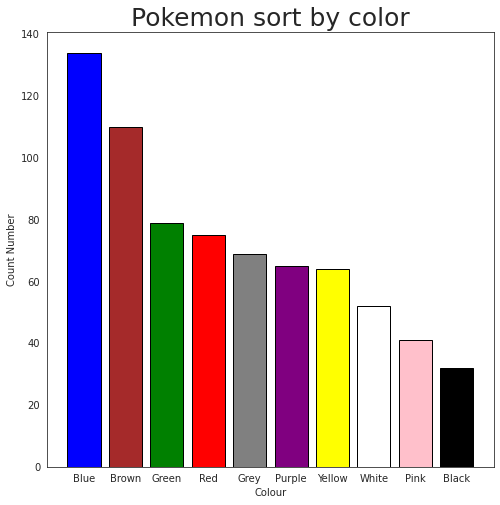

In [ ]:
color = rd.Color.value_counts().index
color= list(color)
plt.figure(figsize=(8,8))
plt.xlabel("Colour")
plt.ylabel("Count Number")
plt.title("Pokemon sort by color", fontsize="25")
plt.bar(rd.Color.value_counts().index, rd.Color.value_counts(), color= color, edgecolor='black')
plt.show()

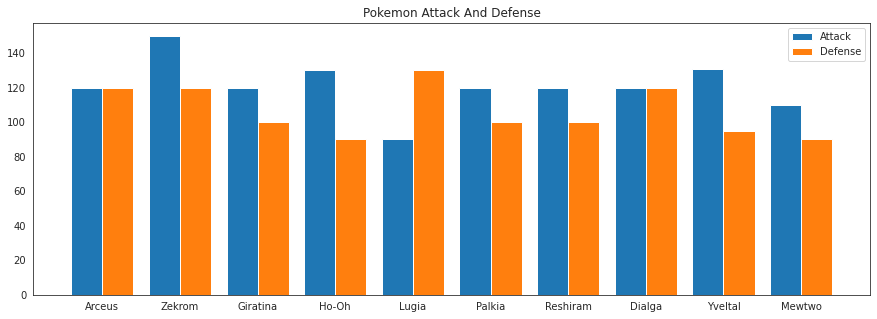

In [ ]:
var = np.arange(len(Total_Top_10.Name))
plt.figure(figsize=(15, 5))
plt.xticks(var,Total_Top_10.Name)
plt.title('Pokemon Attack And Defense')
plt.bar(var-0.2, Total_Top_10.Attack, width=0.4, label="Attack")
plt.bar(var+0.2, Total_Top_10.Defense, width=0.4, label="Defense")
plt.legend()

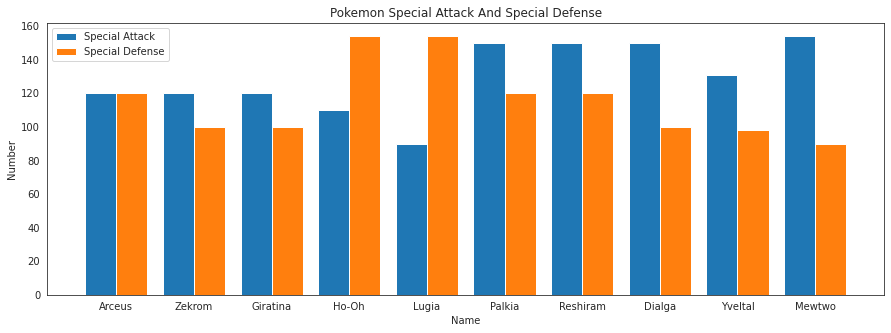

In [ ]:
plt.figure(figsize=(15, 5))
plt.xticks(var,Total_Top_10.Name)

plt.ylabel("Number")
plt.xlabel("Name")
plt.title('Pokemon Special Attack And Special Defense')

plt.bar(var-0.2, Total_Top_10.Sp_Atk, width=0.4, label="Special Attack")
plt.bar(var+0.2, Total_Top_10.Sp_Def, width=0.4, label="Special Defense")

plt.legend(); plt.show()

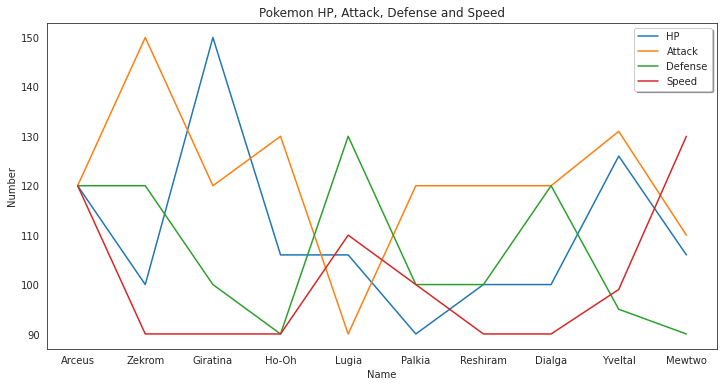

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel("Number")
plt.xlabel("Name")
plt.title('Pokemon HP, Attack, Defense and Speed')
plt.plot(Total_Top_10.Name, Total_Top_10.HP, label="HP")
plt.plot(Total_Top_10.Name, Total_Top_10.Attack, label="Attack")
plt.plot(Total_Top_10.Name, Total_Top_10.Defense, label="Defense")
plt.plot(Total_Top_10.Name, Total_Top_10.Speed, label="Speed")
plt.legend(loc="best", shadow=True)
plt.show()


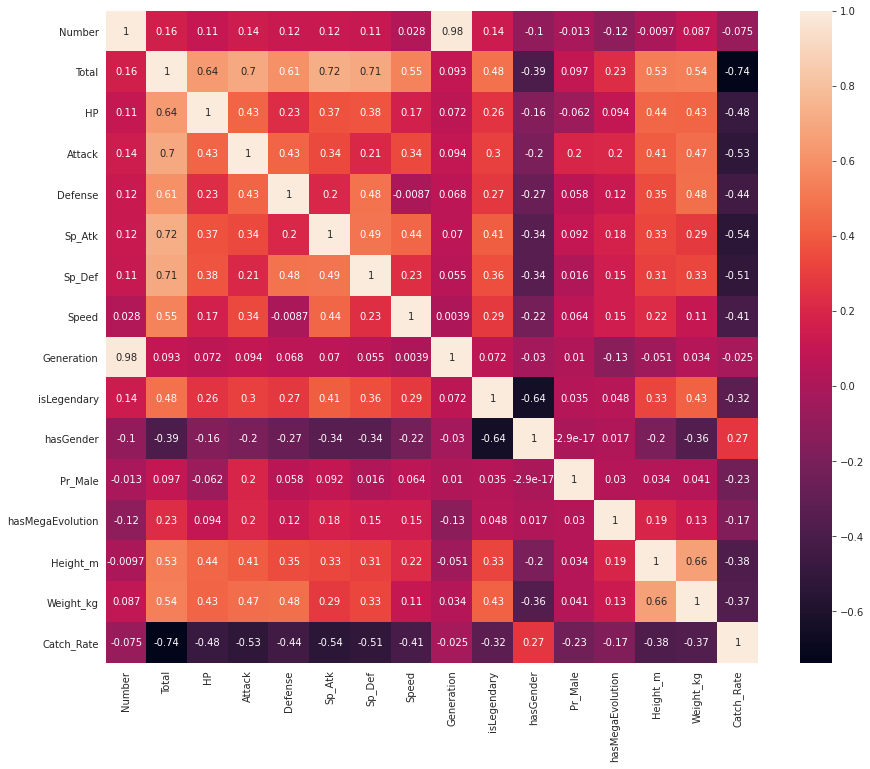

In [ ]:
fig_dims = (15,12)
fig , ax = plt.subplots(figsize = fig_dims)
sns.heatmap(rd.corr(), square=True, annot=True, ax = ax)
plt.show()

if the pokemon is legendary or not it has nothing to do with his number, generation, hasGender, Pr_Male, HasMegaEvolution and his CatchRate

Type_1	Type_2 isLegendary	Color	hasGender	Egg_Group_1	Egg_Group_2 Body_Style

In [ ]:
rd.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,Flying,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [ ]:
rd.drop(columns=["Number", "Generation", "hasGender", "Pr_Male", "hasMegaEvolution","Catch_Rate","Number",	"Name"],axis = 0, inplace=True)

In [ ]:
rd["Type_1"]= LabelEncoder().fit_transform(rd["Type_1"])
rd["isLegendary"]= LabelEncoder().fit_transform(rd["isLegendary"])
rd["Color"]= LabelEncoder().fit_transform(rd["Color"])
rd["Egg_Group_1"]= LabelEncoder().fit_transform(rd["Egg_Group_1"])
rd["Body_Style"]= LabelEncoder().fit_transform(rd["Body_Style"])
rd["Type_2"]= LabelEncoder().fit_transform(rd["Type_2"])
rd["Egg_Group_2"]= LabelEncoder().fit_transform(rd["Egg_Group_2"])

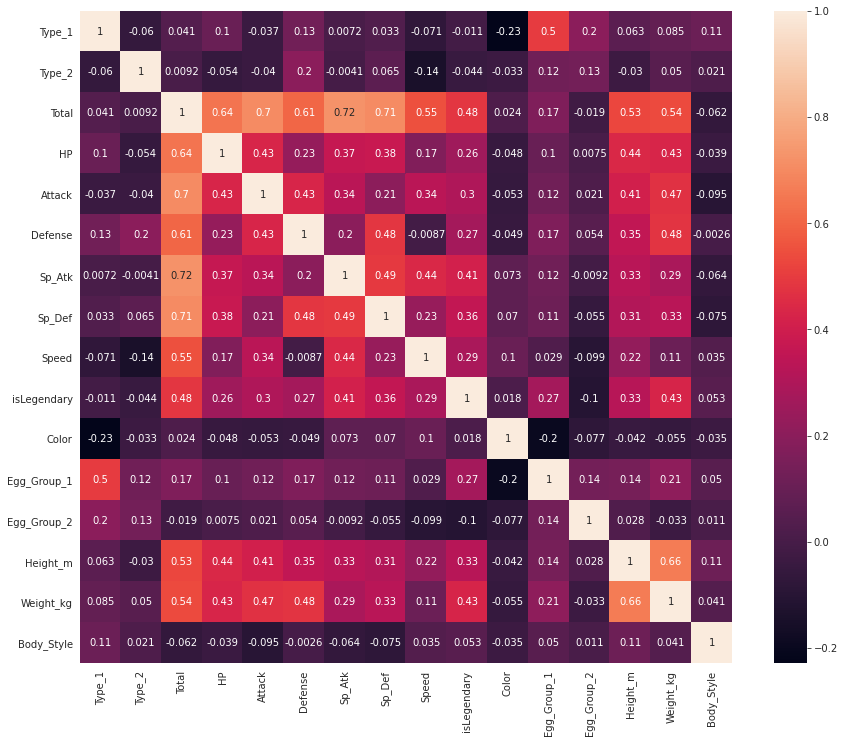

In [ ]:
fig_dims = (15,12)
fig , ax = plt.subplots(figsize = fig_dims)
sns.heatmap(rd.corr(), square=True, annot=True, ax = ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x = rd.drop(columns=["isLegendary"],axis=0)
y = rd["isLegendary"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [ ]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9815668202764977


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf=RandomForestClassifier()
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.9769585253456221


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)  
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.97


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9723502304147466


In [784]:
models = [tree, clf, logreg,knn]
models_name = ["tree", "clf", "logreg","knn"]
var = 0
from sklearn.model_selection import cross_val_score
for i in models:
  scores = cross_val_score(i ,x ,y , cv=10)
  average_score = sum(scores)/10
  print( models_name[var]," average accuracy is ", average_score)
  var += 1

tree  average accuracy is  0.9888888888888889
clf  average accuracy is  0.9833333333333332
logreg  average accuracy is  0.975
knn  average accuracy is  0.9695015220700153


so the best method to predict if a pokemon is legendary or not is the decision tree